In [3]:
import copy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors
import matplotlib.cm as mp_cm

import lfes data, add rho column

In [4]:
lfes = pd.read_csv('../data/calculated/Joined_LFEs_w_phases.csv', usecols=['start', 'end', 'duration', 'subLST', 'subLat', 'R_ksm', 'x_ksm', 'y_ksm', 'z_ksm'])

lfes['rho'] = np.sqrt(lfes['x_ksm']**2 + lfes['y_ksm']**2)

lfes

,start,end,x_ksm,y_ksm,z_ksm,R_ksm,subLST,subLat,duration,rho
0,2004-01-01 14:30:00.000,2004-01-01 16:03:00.000,661.934428,-1278.464845,-133.754364,1445.862987,7.524167,-19.815590,5580.0,1439.662998
1,2004-01-02 05:06:00.000,2004-01-02 10:42:00.000,659.308606,-1274.576701,-133.997206,1441.245592,7.522500,-19.815244,20160.0,1435.002998
2,2004-01-02 21:42:00.000,2004-01-03 03:03:00.000,656.327085,-1270.250611,-133.347868,1435.995651,7.520556,-19.814847,19260.0,1429.790844
3,2004-01-03 23:39:00.000,2004-01-04 01:18:00.000,651.675000,-1263.356873,-133.526119,1427.788541,7.517778,-19.814223,5940.0,1421.531179
4,2004-01-04 01:39:00.000,2004-01-04 08:09:00.000,651.316907,-1262.845872,-133.344779,1427.155997,7.517500,-19.814175,23400.0,1420.912879
...,...,...,...,...,...,...,...,...,...,...
4548,2017-09-10 23:36:00.000,2017-09-11 01:24:00.000,-16.642867,4.309377,8.199832,19.047126,23.128333,-0.544714,6480.0,17.191735
4549,2017-09-11 02:27:00.000,2017-09-11 04:06:00.000,-16.892457,4.256448,8.629980,19.440910,23.157222,0.453786,5940.0,17.420460
4550,2017-09-11 04:24:00.000,2017-09-11 10:24:00.000,-17.038932,4.212010,8.912990,19.685213,23.176111,1.114904,21600.0,17.551815
4551,2017-09-11 10:36:00.000,2017-09-11 15:03:00.000,-17.380144,4.047623,9.743447,20.331931,23.233889,3.120457,16020.0,17.845242


longest lfes by duration

In [5]:
n_longest = 10

longest_lfes = lfes.nlargest(n_longest, 'duration')

longest_lfes

,start,end,x_ksm,y_ksm,z_ksm,R_ksm,subLST,subLat,duration,rho
804,2005-11-04 14:57:00.000,2005-11-09 17:54:00.000,-12.126148,-38.606267,-4.346941,40.698688,4.769722,0.029283,442620.0,40.465879
563,2005-04-09 15:18:00.000,2005-04-14 10:24:00.000,15.618792,-31.330242,3.407004,35.172978,7.779722,-5.426168,414360.0,35.007581
3856,2014-12-22 07:54:00.000,2014-12-26 16:15:00.000,-21.405810,-37.614953,34.374240,55.269176,3.226944,29.211089,375660.0,43.279249
463,2004-12-26 20:09:00.000,2004-12-31 01:39:00.000,10.801779,-55.585755,-0.297541,56.626346,6.668333,-5.586102,365400.0,56.625564
490,2005-02-03 02:06:00.000,2005-02-07 01:48:00.000,19.235559,-55.361760,3.655398,58.722169,7.272778,-4.842313,344520.0,58.608286
1308,2007-01-07 08:21:00.000,2007-01-11 04:00:00.000,-24.114820,6.491618,17.458763,30.470872,22.745833,54.380695,329940.0,24.973298
541,2005-03-23 04:30:00.000,2005-03-26 20:00:00.000,22.474085,-33.078667,9.113745,41.016375,8.416389,-0.121892,315000.0,39.991032
2912,2011-05-12 11:48:00.000,2011-05-15 21:54:00.000,18.339311,0.471003,-3.053394,18.597725,12.096667,-0.012628,295560.0,18.345358
4348,2016-11-30 14:06:00.000,2016-12-04 00:12:00.000,-15.795959,-9.496280,10.322258,21.124409,1.790833,7.181761,295560.0,18.430726
1767,2007-12-21 22:45:00.000,2007-12-25 08:18:00.000,24.460568,-0.452556,6.704054,25.366681,11.931667,7.521793,293580.0,24.464754


LFEs between 14-17 LST and >50 $R_s$

In [7]:
lfe_14_17_50 = lfes[(14<=lfes['subLST']) & (lfes['subLST']<=17) & (lfes['R_ksm']>=50)]
lfe_14_17_50

,start,end,x_ksm,y_ksm,z_ksm,R_ksm,subLST,subLat,duration,rho
1594,2007-07-31 00:09:00.000,2007-07-31 05:39:00.000,47.156162,31.694175,9.626013,57.627116,14.224444,0.198764,19800.0,56.817465
1595,2007-07-31 10:09:00.000,2007-08-01 15:15:00.000,47.548469,32.925359,9.703931,58.643861,14.276944,0.203232,104760.0,57.835423
1596,2007-08-01 16:24:00.000,2007-08-01 19:42:00.000,48.424210,36.426226,9.877121,61.394882,14.426111,0.215674,11880.0,60.595165
1597,2007-08-01 20:45:00.000,2007-08-02 02:06:00.000,48.513929,36.899094,9.907703,61.751980,14.446389,0.217348,19260.0,60.951985
1598,2007-08-02 05:57:00.000,2007-08-02 07:15:00.000,48.675265,37.884998,9.937568,62.476473,14.488611,0.220805,4680.0,61.681070
...,...,...,...,...,...,...,...,...,...,...
2939,2011-06-06 00:03:00.000,2011-06-06 05:24:00.000,19.944957,59.312387,-3.049714,62.650310,16.747778,0.432109,19260.0,62.576038
2940,2011-06-06 11:09:00.000,2011-06-06 19:18:00.000,18.891717,58.843594,-2.875658,61.868691,16.800833,0.434501,29340.0,61.801824
2941,2011-06-06 20:11:59.000,2011-06-07 05:30:00.000,18.016434,58.411443,-2.719494,61.187288,16.845278,0.436434,33481.0,61.126824
2942,2011-06-07 11:33:00.000,2011-06-07 16:26:59.000,16.498297,57.569642,-2.479344,59.938340,16.922778,0.439681,17639.0,59.887039


LFEs between 05-06 LST and 80-90 $R_s$ 

In [8]:
lfe_5_6_80_90 = lfes[(5<=lfes['subLST']) & (lfes['subLST']<=6) & (lfes['R_ksm']>=80) & (lfes['R_ksm'] <= 90)]
lfe_5_6_80_90

,start,end,x_ksm,y_ksm,z_ksm,R_ksm,subLST,subLat,duration,rho
249,2004-07-13 03:45:00.000,2004-07-13 12:18:00.000,-6.871476,-75.096036,-28.991965,80.790878,5.090000,-20.556566,30780.0,75.409760
250,2004-07-14 01:12:00.000,2004-07-14 13:00:00.000,-6.616726,-78.325231,-29.975013,84.125646,5.118333,-20.581368,42480.0,78.604217
251,2004-07-15 02:12:00.000,2004-07-15 02:42:00.000,-6.309726,-81.907739,-31.084282,87.834634,5.148333,-20.606536,1800.0,82.150413
252,2004-07-15 03:03:00.000,2004-07-16 14:21:00.000,-6.299120,-82.025710,-31.122909,87.957555,5.149444,-20.607331,127080.0,82.267223


import ephemeris data

In [9]:
ephemeris = pd.read_csv('../data/calculated/20040101000000_20170915115700_ephemeris.csv', usecols=['x_KSM', 'y_KSM', 'z_KSM'])

ephemeris['rho'] = np.sqrt(ephemeris['x_KSM']**2 + ephemeris['y_KSM']**2)

In [10]:
# Choose bin limits
rho_min, rho_max = 0, 100
z_min, z_max = -50, 50

# Create bins (in saturn radii)
bin_size = 2
rho_bins = np.arange(rho_min, rho_max+2, bin_size)
z_bins = np.arange(z_min, z_max+2, bin_size)

## LFE data
# Bin the data
lfes['rho_bins'] = pd.cut(lfes['rho'], bins=rho_bins)
lfes['z_bins'] = pd.cut(lfes['z_ksm'], bins=z_bins)

# Create mapped data, ready to plot
lfe_counts = lfes.groupby(['z_bins', 'rho_bins']).size()
lfe_map = lfe_counts.to_numpy().reshape(len(z_bins)-1, len(rho_bins)-1)

## Repeat for ephemeris data
# Bin the data
ephemeris['rho_bins'] = pd.cut(ephemeris['rho'], bins=rho_bins)
ephemeris['z_bins'] = pd.cut(ephemeris['z_KSM'], bins=z_bins)

# Create mapped data, ready to plot
eph_counts = ephemeris.groupby(['z_bins', 'rho_bins']).size()
eph_map = eph_counts.to_numpy().reshape(len(z_bins)-1, len(rho_bins)-1)

/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_33038/3756912143.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lfe_counts = lfes.groupby(['z_bins', 'rho_bins']).size()
/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_33038/3756912143.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eph_counts = ephemeris.groupby(['z_bins', 'rho_bins']).size()


z-rho grid, 2 or 1 R_s bin. amount of lfe start in each bin

(-50.0, 50.0)

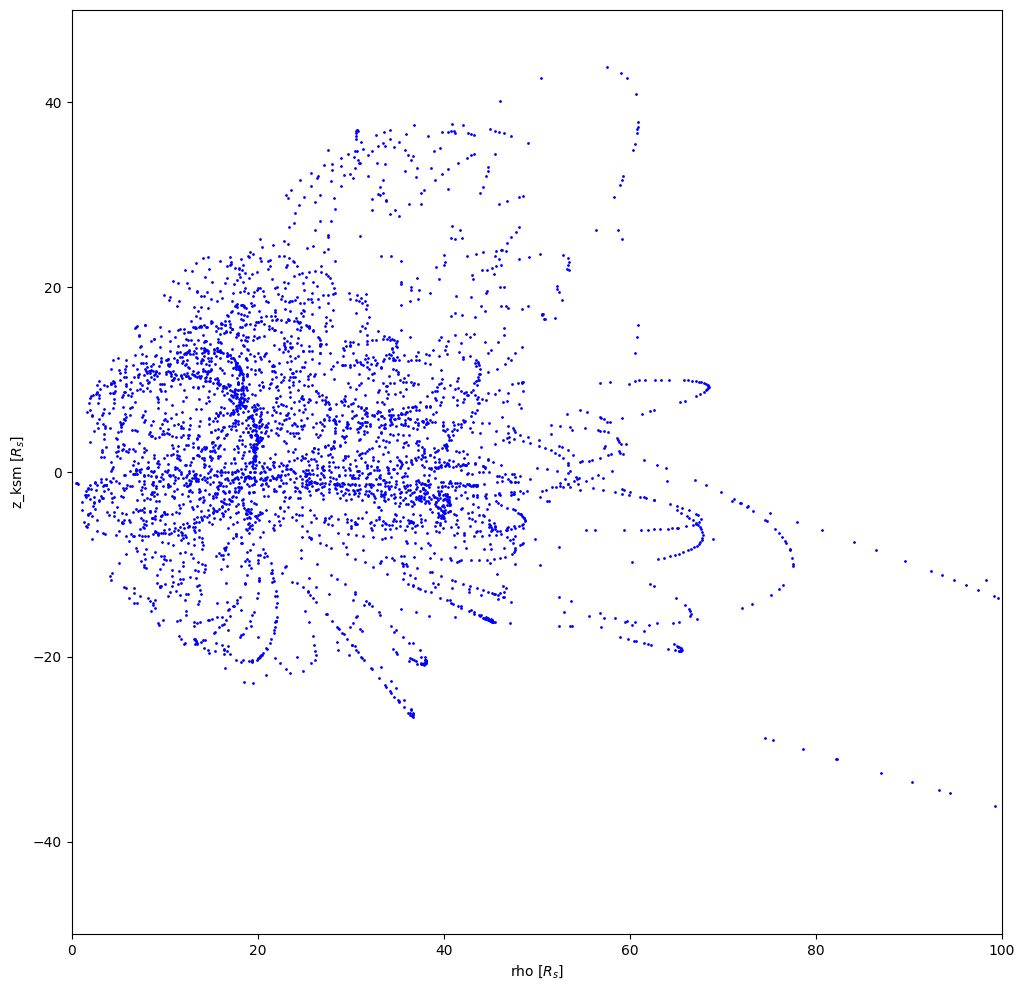

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()

ax.plot(lfes['rho'], lfes['z_ksm'], '.', ms=2, c='blue')
ax.set_xlabel('rho $[R_{s}]$')
ax.set_ylabel('z_ksm $[R_{s}]$')

ax.set_xlim(rho_min, rho_max)
ax.set_ylim(z_min, z_max)

In [12]:
combined_map = np.copy(lfe_map).astype(float)

# Set values to nan where eph_map is 0
combined_map[eph_map == 0] = np.nan

/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_33038/1967998741.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_cmap = copy.copy(mp_cm.get_cmap('inferno')) # copy the default cmap


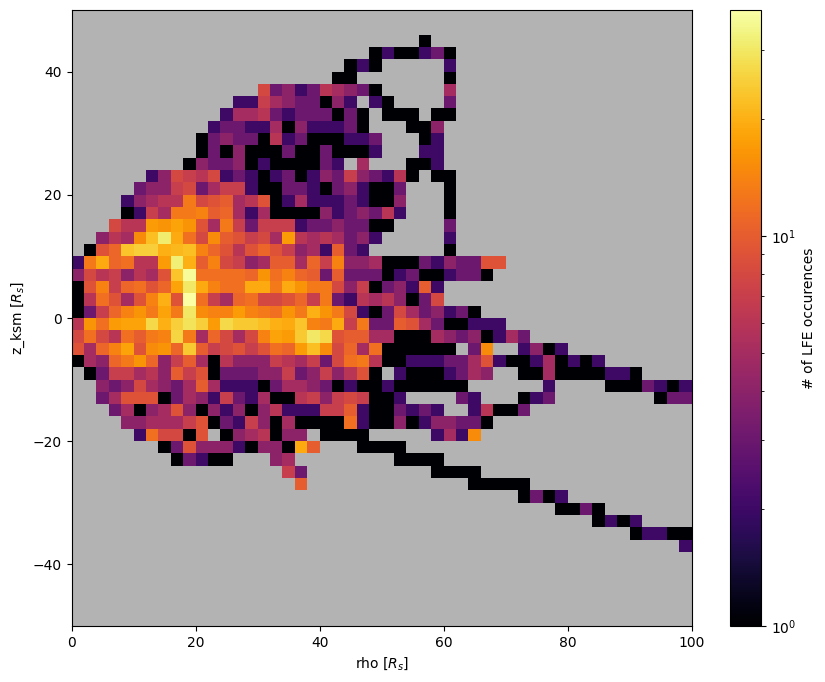

In [13]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax = fig.add_subplot()

# Map of LFE counts
norm = mp_colors.LogNorm()

my_cmap = copy.copy(mp_cm.get_cmap('inferno')) # copy the default cmap
my_cmap.set_bad((0.7,0.7,0.7))

map = ax.pcolormesh(rho_bins, z_bins, combined_map+1, cmap=my_cmap, norm=norm)
ax.set_xlabel('rho $[R_{s}]$')
ax.set_ylabel('z_ksm $[R_{s}]$')

ax.set_xlim(rho_min, rho_max)
ax.set_ylim(z_min, z_max)

# Colorbar
cbar = fig.colorbar(map, label='# of LFE occurences')

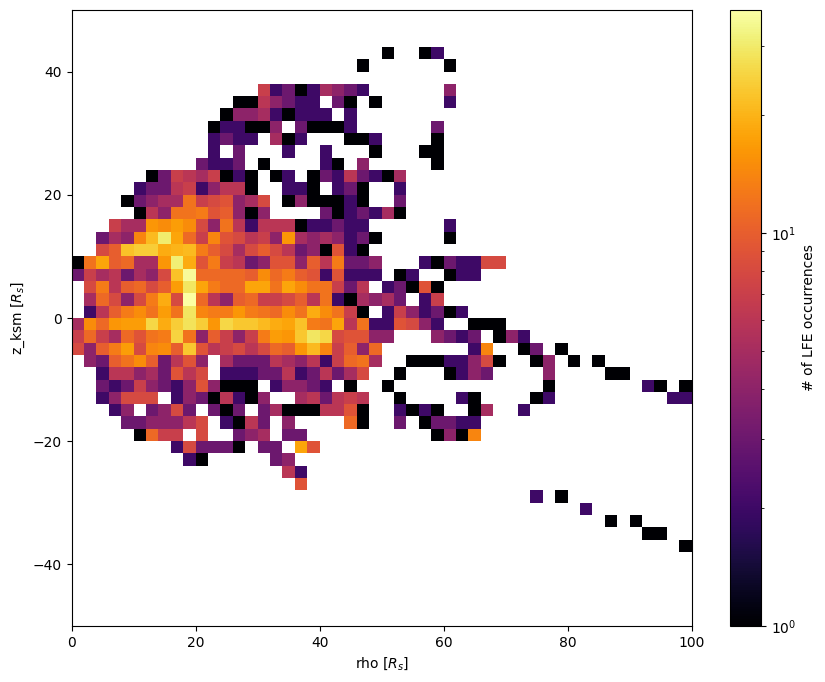

In [14]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax = fig.add_subplot()

# Map of LFE counts
norm = mp_colors.LogNorm()
map = ax.pcolormesh(rho_bins, z_bins, lfe_map, cmap='inferno', norm=norm, facecolor='grey')
ax.set_xlabel('rho $[R_{s}]$')
ax.set_ylabel('z_ksm $[R_{s}]$')

ax.set_xlim(rho_min, rho_max)
ax.set_ylim(z_min, z_max)

# Colorbar
#cbar = fig.colorbar(map, label='# of LFE occurences', ticks=np.arange(start_map.min(), start_map.max()+1)[::2])

cbar = fig.colorbar(map, label='# of LFE occurrences')

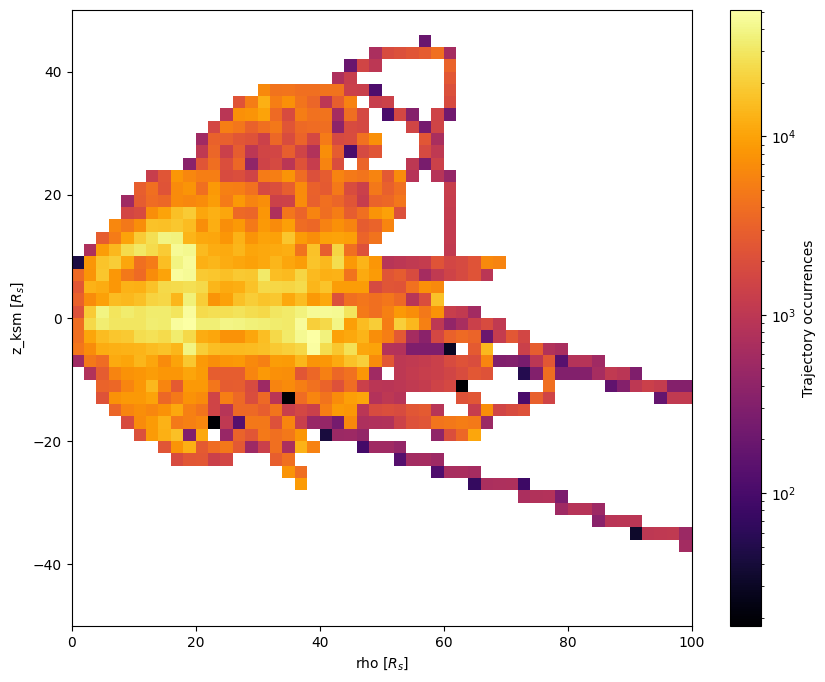

In [15]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax = fig.add_subplot()

# Map of LFE counts
norm = mp_colors.LogNorm()
map = ax.pcolormesh(rho_bins, z_bins, eph_map, cmap='inferno', norm=norm, facecolor='grey')
ax.set_xlabel('rho $[R_{s}]$')
ax.set_ylabel('z_ksm $[R_{s}]$')

ax.set_xlim(rho_min, rho_max)
ax.set_ylim(z_min, z_max)

# Colorbar
#cbar = fig.colorbar(map, label='# of LFE occurences', ticks=np.arange(start_map.min(), start_map.max()+1)[::2])

cbar = fig.colorbar(map, label='Trajectory occurrences')

1) Spacecraft was never there (nan)
2) Spacecraft was there but no LFEs (0)
3) Spacecraft was there and LFEs (colorbar)